[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Zaba_et_al/global_meteoric_water_line.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Zaba_et_al/global_meteoric_water_line.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Zaba_et_al/global_meteoric_water_line.ipynb)

## Global Meteoric Water Line
GMWL is a linear relation between isotopic deltas for oxygen-18 and deuterium originating from [Craig 1961](https://doi.org/10.1126/science.133.3465.1702). Here, we explore how the linear relationship coefficients can be linked with equilibrium fractionation factors $\alpha(T)$.

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from PySDM import Formulae
from PySDM.physics.constants import si, in_unit, PER_MILLE
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [3]:
f = {}
alphas = {}
variants = {
    "HoritaAndWesolowski1994",
    "Majoube1971",
    "VanHook1968"
}
for variant in variants:
    f[variant] = Formulae(isotope_equilibrium_fractionation_factors=variant)
    alphas[variant] = {}
    alphas[variant]['18O'] = f[variant].isotope_equilibrium_fractionation_factors.alpha_l_18O
    alphas[variant]['2H'] = f[variant].isotope_equilibrium_fractionation_factors.alpha_l_2H

In [4]:
def a_coeff(alpha_D, alpha_O, B):
    """ slope coefficient assuming isotopic equilibrium with SMOW """
    return (alpha_D - 1 - B) / (alpha_O - 1)

def b_coeff(alpha_D, alpha_O, A):
    """ intercept coefficient assuming isotopic equilibrium with SMOW """
    return alpha_D - 1 - A * (alpha_O - 1)

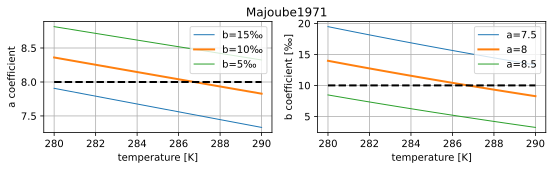

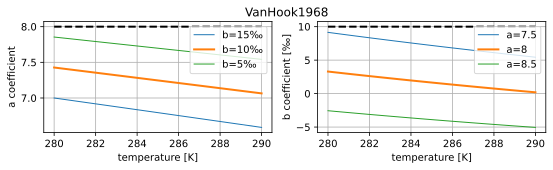

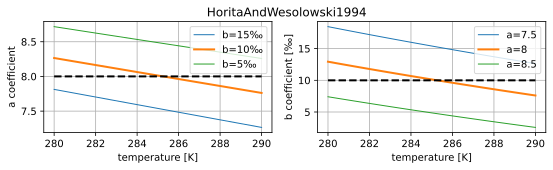

In [5]:
T = np.linspace(280, 290) * si.K
thick = 2
thin = 1
lines = {}
for variant in variants:
    const = f[variant].constants
    lines[variant] = {}
    fig, axs = pyplot.subplots(1, 2, figsize=(9, 2))
    for db in (5 * PER_MILLE, 0, -5 * PER_MILLE):
        b = const.CRAIG_1961_INTERCEPT_COEFF + db
        label = f"b={in_unit(b, PER_MILLE):.3g}"
        lines[variant][label] = a_coeff(alphas[variant]['2H'](T), alphas[variant]['18O'](T), b)
        axs[0].plot(T, lines[variant][label], label=f"b={in_unit(b, PER_MILLE):.3g}‰", linewidth=thick if db==0 else thin)
    axs[0].set_ylabel('a coefficient')
    axs[0].hlines(const.CRAIG_1961_SLOPE_COEFF, xmin=T[0], xmax=T[-1], color='k', linewidth=thick, linestyle='--')
    
    for da in (-.5, 0, .5):
        a = const.CRAIG_1961_SLOPE_COEFF + da
        label = f'{a=}'
        lines[variant][label] = in_unit(b_coeff(alphas[variant]['2H'](T), alphas[variant]['18O'](T), a), PER_MILLE)
        plot_b = axs[1].plot(T, lines[variant][label], label=label, linewidth=thick if da==0 else thin)
    axs[1].set_ylabel('b coefficient [‰]')
    axs[1].hlines(in_unit(const.CRAIG_1961_INTERCEPT_COEFF, PER_MILLE), xmin=T[0], xmax=T[-1], color='k', linewidth=thick, linestyle='--')
    
    for ax in axs:
        ax.legend()
        ax.grid()
        ax.set_xlabel('temperature [K]')
    fig.suptitle(variant)
    show_plot(f'fig_{variant}.pdf')